In [11]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [103]:
knapsack = {0: (1, 5000), 1: (10, 1000), 2: (100, 2000), 3: (200, 5000), 4: (300, 4000)}
weight_limit = 400
array_weight = 0
# isinstance(knapsack[0], tuple)
# len(knapsack)

In [101]:
knapsack = {0: (1, 5000), 1: (1000, 1000), 2: (100, 2000), 3: (200, 500), 4: (300, 10000), 5: (700, 400), 6: (50, 500), 7: (100,1500), 8: (10,3500)}
weight_limit = 5000
array_weight = 0
# isinstance(knapsack[0], tuple)
# len(knapsack)

In [104]:
knapsack = {0: (100, 100), 1: (100, 200), 2: (100, 150), 3: (100, 500)}
weight_limit = 400
array_weight = 0
# isinstance(knapsack[0], tuple)
# len(knapsack)

In [ ]:
# array = np.random.randint(2, size=5)
# array
# dictanorysize=9

# Functions

### Check if random array is smaller than weight = feasability

In [2]:
def check_feasibility(array, knapsack):
    array_weight = 0
    for i in range(len(knapsack)):
        knapsack_weight = knapsack[i]
        dummy = array[i]*knapsack_weight[0]
        array_weight = array_weight + dummy
    
    feasible = (weight_limit >= array_weight) and array_weight > 0
    return feasible

### Hill-climbing swap function

In [3]:
def swap(array):  
    best_array = array   

    for i in range(len(best_array)):
        dummy_array = np.copy(array)
        dummy_var = dummy_array[i]
        if(i < (len(best_array)-1)):

            dummy_array[i] = dummy_array[i+1]
            dummy_array[i+1] = dummy_var
            
        else:
            dummy_array[i] = dummy_array[i-len(array)+1]
            dummy_array[i-len(array)+1] = dummy_var
       
        if check_feasibility(dummy_array, knapsack) == True:
            if getValuefromArray(dummy_array, knapsack) > getValuefromArray(best_array, knapsack):
                best_array = dummy_array
    print("return from swap fn")            
    return best_array

### First-choice-hill-climbing swap function

In [51]:
def fcSwap(array):  
    best_array = array   

    for i in range(len(best_array)):
        dummy_array = np.copy(array)
        dummy_var = dummy_array[i]
        if(i < (len(best_array)-1)):

            dummy_array[i] = dummy_array[i+1]
            dummy_array[i+1] = dummy_var
            
        else:
            dummy_array[i] = dummy_array[i-len(array)+1]
            dummy_array[i-len(array)+1] = dummy_var
       
        if check_feasibility(dummy_array, knapsack) == True:
            if getValuefromArray(dummy_array, knapsack) > getValuefromArray(best_array, knapsack):
                best_array = dummy_array
                break
    print("return from fcswap fn")
    return best_array

### Hill-climbing transposition function

In [68]:
def transp(array):  
    best_array = array   
    for i in range(len(best_array)):
       
        
            for j in range(len(best_array)):              
#             for j in range(len(best_array)):
                dummy_array = np.copy(array)
                dummy_var = dummy_array[i]
                dummy_array[i] = dummy_array[j]
                dummy_array[j] = dummy_var

                if check_feasibility(dummy_array, knapsack) == True:
                    if getValuefromArray(dummy_array, knapsack) > getValuefromArray(best_array, knapsack):
                        best_array = dummy_array
    print("return from transp fn") 
    return best_array

### First-choice-hill-climbing transposition function

In [111]:
def fcTransp(array):  
    best_array = array   
    for i in range(len(best_array)):
       
            for j in range(len(best_array)):
#           for j in range(i+1, len(best_array)):
                
                dummy_array = np.copy(array)
                dummy_var = dummy_array[i]
                dummy_array[i] = dummy_array[j]
                dummy_array[j] = dummy_var
                print("inside fctransp for i")
                print(i)
                print("inside fctransp for j")
                print(j)
                print(dummy_array)

                if check_feasibility(dummy_array, knapsack) == True:
                    if getValuefromArray(dummy_array, knapsack) > getValuefromArray(best_array, knapsack):
                        best_array = dummy_array
                        print("inside fc after if value higher")
                        print(best_array)
                        break
    print("after break")
    print(best_array)
    print("return from fctransp fn")            
    return best_array

### Get Knapsack Value

In [70]:
def getValuefromArray(array, knapsack): 
    array_value = 0
    for i in range(len(knapsack)):
        knapsack_value = knapsack[i]
        dummy = array[i]*knapsack_value[1]
        array_value = array_value + dummy
    
    return array_value

In [71]:
# # checking if function works
# knapsack = {0: (1, 5000), 1: (10, 1000), 2: (100, 2000), 3: (200, 5000), 4: (300, 4000)}
# test = knapsack[0]
# test[1]
# array = np.random.randint(2, size=5)
# print(array)
# print(array[0])
# getValuefromArray(array, knapsack)

### Get Knapsack Weight

In [72]:
def getWeightfromArray(array, knapsack):
    array_weight = 0
    for i in range(len(knapsack)):
        knapsack_weight = knapsack[i]
        dummy = array[i]*knapsack_weight[0]
        array_weight = array_weight + dummy
    return array_weight

# Action

In [112]:
feasible = False
converged = False
converged_fcSwap = False
converged_transp = False
converged_fctransp = False
count = 0
# start = datetime.now()
totalCount = 0
totalValue = 0
totalWeight = 0
totalTime = 0


while(not feasible):
    array = np.random.randint(2, size=4)
    feasible = check_feasibility(array, knapsack)

#array = [1, 0, 0, 0]



trarray=array
fctrarray=array
array_transp=array
array_fctransp=array
# while(not converged):   
#     count += 1
#     best_array = swap(array)
#     converged = getValuefromArray(best_array, knapsack) <= getValuefromArray(trarray, knapsack)
#     trarray = best_array

    
# # print("Starting FCSWAP Now")

# while(not converged_fcSwap):   
#     count += 1
#     best_array = fcSwap(array)
#     converged_fcSwap = getValuefromArray(best_array, knapsack) <= getValuefromArray(fctrarray, knapsack)
#     fctrarray = best_array
#     print("fctrarray")
#     print(fctrarray)
    
while(not converged_transp):
        count3 += 1
        best_array_transp = transp(array)
        converged_transp = getValuefromArray(best_array_transp, knapsack) <= getValuefromArray(array_transp, knapsack)
        array_transp = np.copy(best_array_transp)

     
    
while(not converged_fctransp): 
        count4 += 1
        best_array_fctransp = fcTransp(array)
        converged_fctransp = getValuefromArray(best_array_fctransp, knapsack) <= getValuefromArray(array_fctransp, knapsack)
        array_fctransp = np.copy(best_array_fctransp)

    
    
totalCount += count
totalValue += getValuefromArray(array, knapsack)
totalWeight = getWeightfromArray(array, knapsack)
#totalTime += datetime.now() - start
print(array)
print(array_transp)
print(array_fctransp)
# print("trarray")
# print(trarray)
# print(getValuefromArray(trarray, knapsack))
# print(getWeightfromArray(trarray, knapsack))
# print("fctrarray")
# print(fctrarray)
# print(getValuefromArray(fctrarray, knapsack))
# print(getWeightfromArray(fctrarray, knapsack))
# knapsack = {0: (100, 100), 1: (100, 200), 2: (100, 150), 3: (100, 500)}
# weight_limit = 400
# array_weight = 0
# isinstance(knapsack[0], tuple)
# len(knapsack)
# print(count)
# print(datetime.now() - start)

return from transp fn
return from transp fn
inside fctransp for i
0
inside fctransp for j
0
[1 1 1 0]
inside fctransp for i
0
inside fctransp for j
1
[1 1 1 0]
inside fctransp for i
0
inside fctransp for j
2
[1 1 1 0]
inside fctransp for i
0
inside fctransp for j
3
[0 1 1 1]
inside fc after if value higher
[0 1 1 1]
inside fctransp for i
1
inside fctransp for j
0
[1 1 1 0]
inside fctransp for i
1
inside fctransp for j
1
[1 1 1 0]
inside fctransp for i
1
inside fctransp for j
2
[1 1 1 0]
inside fctransp for i
1
inside fctransp for j
3
[1 0 1 1]
inside fctransp for i
2
inside fctransp for j
0
[1 1 1 0]
inside fctransp for i
2
inside fctransp for j
1
[1 1 1 0]
inside fctransp for i
2
inside fctransp for j
2
[1 1 1 0]
inside fctransp for i
2
inside fctransp for j
3
[1 1 0 1]
inside fctransp for i
3
inside fctransp for j
0
[0 1 1 1]
inside fctransp for i
3
inside fctransp for j
1
[1 0 1 1]
inside fctransp for i
3
inside fctransp for j
2
[1 1 0 1]
inside fctransp for i
3
inside fctransp for 

In [91]:
# def swap(array):  
#     best_array = array   
# #     print(len((array)))
#     for i in range(len(best_array)):
#         dummy_array = np.copy(array)
#         dummy_var = dummy_array[i]
#         if(i < (len(best_array)-1)):
#             print("i<max")
#             print(i)
#             dummy_array[i] = dummy_array[i+1]
#             dummy_array[i+1] = dummy_var
#             print("dummyarray_lt max")    
#             print(dummy_array)
            
#         else:
#             print("i=max")
#             print(i)
#             dummy_array[i] = dummy_array[i-len(array)+1]
#             dummy_array[i-len(array)+1] = dummy_var
#             print("dummyarray_ MAX")    
#             print(dummy_array)
        
#         if check_feasibility(dummy_array, knapsack) == True:
#             if getValuefromArray(dummy_array, knapsack) > getValuefromArray(best_array, knapsack):
#                 best_array = dummy_array
#                 print("best array in swap function")
#                 print(best_array)
# #                 break
# #         print("swap")
# #         print(best_array)
#     return best_array

In [ ]:
# def fcSwap(array):  
#     best_array = array   
# #     print(len((array)))
#     for i in range(len(best_array)):
#         dummy_array = np.copy(array)
#         dummy_var = dummy_array[i]
#         if(i < (len(best_array)-1)):
#             print("i<max")
#             print(i)
#             dummy_array[i] = dummy_array[i+1]
#             dummy_array[i+1] = dummy_var
#             print("dummyarray_lt max")    
#             print(dummy_array)
            
#         else:
#             print("i=max")
#             print(i)
#             dummy_array[i] = dummy_array[i-len(array)+1]
#             dummy_array[i-len(array)+1] = dummy_var
#             print("dummyarray_ MAX")    
#             print(dummy_array)
        
#         if check_feasibility(dummy_array, knapsack) == True:
#             if getValuefromArray(dummy_array, knapsack) > getValuefromArray(best_array, knapsack):
#                 best_array = dummy_array
#                 print("best array in swap function")
#                 print(best_array)
#                 break
# #         print("swap")
# #         print(best_array)
#     return best_array

# Test Action Loop 100

In [ ]:
# totalCount = 0a
# totalValue = 0
# totalWeight = 0
# #totalTime = 0
# wt_array = []
# time_array = []

# for x in range(99):
#     feasible = False
#     converged = False
#     count = 0
#     start = datetime.now()
#     while(not feasible):
#         array = np.random.randint(2, size=dictanorysize)
#         feasible = check_feasibility(array, knapsack)
#     #print(array)
#     while(not converged):   
#         count += 1
#         best_array = swap(array)
#         converged = getValuefromArray(best_array, knapsack) <= getValuefromArray(array, knapsack)
#         array = best_array

#     totalCount += count
#     totalValue += getValuefromArray(array, knapsack)
#     totalWeight += getWeightfromArray(array, knapsack)
#     totalTime = datetime.now() - start
    
#     wt_array.append(getValuefromArray(array, knapsack)) 
#     #totalTime = datetime.now() - start
#     time_array.append(totalTime)
#     #time_array.append(datetime.now() - start)
    
#     #print(array)
#     #print(getValuefromArray(array, knapsack))
#     #print(getWeightfromArray(array, knapsack))
#     #print(count)
#     #print(datetime.now() - start)

# print('100 Runs:')
# print('Total Count:',totalCount)
# print('Average Count:',totalCount / 100)
# print('Total Value:',totalValue)
# print('Average Value:',totalValue / 100)
# print('Total Weight:',totalWeight)
# print('Average Weight:',totalWeight / 100)
# print('Total Time:',totalTime)
# print('Average Time:',totalTime / 100)

# print('Weight Array:', wt_array)
# #print('Time Array:', time_array)

# Boxplots

# BoxPlot related code

In [38]:
totalCount = 0
totalValue = 0
totalWeight = 0
#totalTime = 0
wt_array = []
wt_array_swap = []
wt_array_fcswap = []
wt_array_transp = []
wt_array_fctransp = []
time_array = []
count1 = 0
totalcount1 = 0
count2 = 0
totalcount2 = 0
count3 = 0
totalcount3 = 0
count4 = 0
totalcount4 = 0
    
for x in range(999):
    feasible = False
    converged = False
    converged_fcswap = False
    converged_transp = False
    converged_fctransp = False
    
    
    start = datetime.now()
    
    print('Weight Array_swap:', wt_array_swap)
    while(not feasible):
        array = np.random.randint(2, size=9)
        print(array)
        array_swap = np.copy(array)
        array_fcswap = np.copy(array)
        array_transp = np.copy(array)
        array_fctransp = np.copy(array)
        feasible = check_feasibility(array, knapsack)

#     array_swap = [0,1,1,0]
#     array_fcswap = [0,1,1,0]
#     #print(array)
    trarry = array_swap
    fctrarry = array_fcswap
    
    while(not converged):   
            count1 += 1
            best_array_swap = swap(array_swap)
            converged = getValuefromArray(best_array_swap, knapsack) <= getValuefromArray(trarry, knapsack)
            trarry = np.copy(best_array_swap)
    #         print("array_swap test ")
    #         print(trarry)

#     print("array_swap")
#     print(trarry)    
    wt_array_swap.append(getValuefromArray(trarry, knapsack))    
    
    
    while(not converged_fcswap):
        count2 += 1
        best_array_fcswap = fcSwap(array_fcswap)
        converged_fcswap = getValuefromArray(best_array_fcswap, knapsack) <= getValuefromArray(fctrarry, knapsack)
#         print("array_fcswap test1 ")
#         print(best_array_fcswap)
        fctrarry = np.copy(best_array_fcswap)
#         print("array_fcswap test2 ")
#         print(fctrarry)
        
#     print("array_fcswap")
#     print(array_fcswap)
    wt_array_fcswap.append(getValuefromArray(fctrarry, knapsack)) 
          
    while(not converged_transp):
        count3 += 1
        best_array_transp = transp(array_transp)
        converged_transp = getValuefromArray(best_array_transp, knapsack) <= getValuefromArray(array_transp, knapsack)
        array_transp = np.copy(best_array_transp)

    wt_array_transp.append(getValuefromArray(array_transp, knapsack)) 
    
    while(not converged_fctransp): 
        count4 += 1
        best_array_fctransp = fcTransp(array_fctransp)
        converged_fctransp = getValuefromArray(best_array_fctransp, knapsack) <= getValuefromArray(array_fctransp, knapsack)
        array_fctransp = np.copy(best_array_fctransp)

    wt_array_fctransp.append(getValuefromArray(array_fctransp, knapsack))  
    
    
    totalcount1 += count1
    totalcount2 += count2
    totalcount3 += count3
    totalcount4 += count4
    totalValue += getValuefromArray(array, knapsack)
    totalWeight += getWeightfromArray(array, knapsack)
    totalTime = datetime.now() - start
    
#     wt_array_swap.append(getValuefromArray(array_swap, knapsack)) 
#     wt_array_fcswap.append(getValuefromArray(array_fcswap, knapsack)) 
#     wt_array_transp.append(getValuefromArray(array_transp, knapsack)) 
#     wt_array_fctransp.append(getValuefromArray(array_fctransp, knapsack)) 
    #totalTime = datetime.now() - start
    #time_array.append(totalTime)
    #time_array.append(datetime.now() - start)
    
    #print(array)
    #print(getValuefromArray(array, knapsack))
    #print(getWeightfromArray(array, knapsack))
    #print(count)
    #print(datetime.now() - start)

    
data_to_plot = [wt_array_swap, wt_array_fcswap, wt_array_transp, wt_array_fctransp ]


print('100 Runs:')
# print('Total Count:',totalCount)
# print('Average Count:',totalCount / 100)
# print('Total Value:',totalValue)
# print('Average Value:',totalValue / 100)
# print('Total Weight:',totalWeight)
# print('Average Weight:',totalWeight / 100)
print('Total Time:',totalTime)
print('Average Time:',totalTime / 100)

#print('Max values:',np.median(wt_array.median,wt_array_fcswap.median,wt_array_transp.median,wt_array_fctransp.median )
print('Median values:',np.median(wt_array_swap,axis=0))
print('Median values:',np.median(wt_array_fcswap,axis=0))
print('Median values:',np.median(wt_array_transp,axis=0))
print('Median values:',np.median(wt_array_fctransp,axis=0))

print("Count1", totalcount1)
#print('Weight Array:', wt_array)
print("Number of elements in Weight Array_swap:", len(wt_array_swap))
print('Value Array_swap:', wt_array_swap)
print("Count2", totalcount2)
print("Number of elements in Weight Array_fcswap:", len(wt_array_fcswap))
print('Value Array_fcSwap:', wt_array_fcswap)
print("Count3", totalcount3)
print("Number of elements in Weight Array_transp:", len(wt_array_transp))
print('Value Array_transp:', wt_array_transp)
print("Count4", totalcount4)
print("Number of elements in Weight Array_fctransp:", len(wt_array_fctransp))
print('Value Array_fcTransp:', wt_array_fctransp)
print('Time Array:', time_array)

Weight Array_swap: []
[0 1 1 0 1 0 0 0 1]
return from swap fn
return from swap fn
return from fcswap fn
return from fcswap fn
return from transp fn
return from transp fn
return from fctransp fn
return from fctransp fn
Weight Array_swap: [20500]
[0 0 0 1 1 1 1 1 0]
return from swap fn
return from swap fn
return from fcswap fn
return from fcswap fn
return from transp fn
return from transp fn
return from fctransp fn
return from fctransp fn
return from fctransp fn
Weight Array_swap: [20500, 14900]
[1 1 0 1 0 1 0 0 0]
return from swap fn
return from swap fn
return from fcswap fn
return from fcswap fn
return from transp fn
return from transp fn
return from fctransp fn
return from fctransp fn
return from fctransp fn
Weight Array_swap: [20500, 14900, 16500]
[0 1 1 1 1 0 1 1 1]
return from swap fn
return from swap fn
return from fcswap fn
return from fcswap fn
return from transp fn
return from transp fn
return from fctransp fn
return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 230

return from transp fn
return from transp fn
return from fctransp fn
return from fctransp fn
return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000]
[1 0 1 1 1 0 0 1 1]
return from swap fn
return from fcswap fn
return from transp fn
return from transp fn
return from fctransp fn
return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500]
[1 0 1 1 1 1 1 1 1]
return from swap fn
return from fcswap fn
return from transp fn
return from transp fn
return from fctransp fn
return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 

return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500]
[0 1 0 1 1 1 1 1 0]
return from swap fn
return from swap fn
return from fcswap fn
return from fcswap fn
return from transp fn
return from transp fn
return from fctransp fn
return from fctransp fn
return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 

Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500, 17900, 21000, 15000, 14400, 13500, 17000, 14500, 7000, 7000, 17000, 16000, 17400, 17500, 17900, 12000, 19400, 22500, 20500, 15900, 14400, 19000, 20400, 19500, 13000, 16500, 18500, 11500, 11500, 15000]
[0 0 0 1 1 1 1 1 0]
return from swap fn
return from swap fn
return from fcswap fn
return from fcswap fn
return from transp fn
return from transp fn
return from fctransp fn
return from fctransp fn
return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 1

return from transp fn
return from transp fn
return from transp fn
return from fctransp fn
return from fctransp fn
return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500, 17900, 21000, 15000, 14400, 13500, 17000, 14500, 7000, 7000, 17000, 16000, 17400, 17500, 17900, 12000, 19400, 22500, 20500, 15900, 14400, 19000, 20400, 19500, 13000, 16500, 18500, 11500, 11500, 15000, 14900, 18400, 23400, 18500, 10000, 9000, 15900, 10000, 19400, 19500, 18900, 8500, 24000, 20000, 14500, 11500, 13500, 17000, 23500, 22500, 17000, 22400, 13900, 19000, 13500, 5500, 23400, 20000, 17500,

return from transp fn
return from fctransp fn
return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500, 17900, 21000, 15000, 14400, 13500, 17000, 14500, 7000, 7000, 17000, 16000, 17400, 17500, 17900, 12000, 19400, 22500, 20500, 15900, 14400, 19000, 20400, 19500, 13000, 16500, 18500, 11500, 11500, 15000, 14900, 18400, 23400, 18500, 10000, 9000, 15900, 10000, 19400, 19500, 18900, 8500, 24000, 20000, 14500, 11500, 13500, 17000, 23500, 22500, 17000, 22400, 13900, 19000, 13500, 5500, 23400, 20000, 17500, 15500, 17400, 6500, 22400, 22000, 13500, 20000, 15500, 7000, 8500, 

Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500, 17900, 21000, 15000, 14400, 13500, 17000, 14500, 7000, 7000, 17000, 16000, 17400, 17500, 17900, 12000, 19400, 22500, 20500, 15900, 14400, 19000, 20400, 19500, 13000, 16500, 18500, 11500, 11500, 15000, 14900, 18400, 23400, 18500, 10000, 9000, 15900, 10000, 19400, 19500, 18900, 8500, 24000, 20000, 14500, 11500, 13500, 17000, 23500, 22500, 17000, 22400, 13900, 19000, 13500, 5500, 23400, 20000, 17500, 15500, 17400, 6500, 22400, 22000, 13500, 20000, 15500, 7000, 8500, 14500, 24000, 20000, 22400, 19500, 20000, 10000, 18500, 15500, 3500, 2

return from transp fn
return from fctransp fn
return from fctransp fn
return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500, 17900, 21000, 15000, 14400, 13500, 17000, 14500, 7000, 7000, 17000, 16000, 17400, 17500, 17900, 12000, 19400, 22500, 20500, 15900, 14400, 19000, 20400, 19500, 13000, 16500, 18500, 11500, 11500, 15000, 14900, 18400, 23400, 18500, 10000, 9000, 15900, 10000, 19400, 19500, 18900, 8500, 24000, 20000, 14500, 11500, 13500, 17000, 23500, 22500, 17000, 22400, 13900, 19000, 13500, 5500, 23400, 20000, 17500, 15500, 17400, 6500, 22400, 22000, 13500, 20

return from transp fn
return from transp fn
return from fctransp fn
return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500, 17900, 21000, 15000, 14400, 13500, 17000, 14500, 7000, 7000, 17000, 16000, 17400, 17500, 17900, 12000, 19400, 22500, 20500, 15900, 14400, 19000, 20400, 19500, 13000, 16500, 18500, 11500, 11500, 15000, 14900, 18400, 23400, 18500, 10000, 9000, 15900, 10000, 19400, 19500, 18900, 8500, 24000, 20000, 14500, 11500, 13500, 17000, 23500, 22500, 17000, 22400, 13900, 19000, 13500, 5500, 23400, 20000, 17500, 15500, 17400, 6500, 22400, 22000, 13500, 2000

Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500, 17900, 21000, 15000, 14400, 13500, 17000, 14500, 7000, 7000, 17000, 16000, 17400, 17500, 17900, 12000, 19400, 22500, 20500, 15900, 14400, 19000, 20400, 19500, 13000, 16500, 18500, 11500, 11500, 15000, 14900, 18400, 23400, 18500, 10000, 9000, 15900, 10000, 19400, 19500, 18900, 8500, 24000, 20000, 14500, 11500, 13500, 17000, 23500, 22500, 17000, 22400, 13900, 19000, 13500, 5500, 23400, 20000, 17500, 15500, 17400, 6500, 22400, 22000, 13500, 20000, 15500, 7000, 8500, 14500, 24000, 20000, 22400, 19500, 20000, 10000, 18500, 15500, 3500, 2

return from transp fn
return from transp fn
return from fctransp fn
return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500, 17900, 21000, 15000, 14400, 13500, 17000, 14500, 7000, 7000, 17000, 16000, 17400, 17500, 17900, 12000, 19400, 22500, 20500, 15900, 14400, 19000, 20400, 19500, 13000, 16500, 18500, 11500, 11500, 15000, 14900, 18400, 23400, 18500, 10000, 9000, 15900, 10000, 19400, 19500, 18900, 8500, 24000, 20000, 14500, 11500, 13500, 17000, 23500, 22500, 17000, 22400, 13900, 19000, 13500, 5500, 23400, 20000, 17500, 15500, 17400, 6500, 22400, 22000, 13500, 2000

return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500, 17900, 21000, 15000, 14400, 13500, 17000, 14500, 7000, 7000, 17000, 16000, 17400, 17500, 17900, 12000, 19400, 22500, 20500, 15900, 14400, 19000, 20400, 19500, 13000, 16500, 18500, 11500, 11500, 15000, 14900, 18400, 23400, 18500, 10000, 9000, 15900, 10000, 19400, 19500, 18900, 8500, 24000, 20000, 14500, 11500, 13500, 17000, 23500, 22500, 17000, 22400, 13900, 19000, 13500, 5500, 23400, 20000, 17500, 15500, 17400, 6500, 22400, 22000, 13500, 20000, 15500, 7000, 8500, 14500, 24000, 20000, 22400, 19500, 20000, 1000

return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500, 17900, 21000, 15000, 14400, 13500, 17000, 14500, 7000, 7000, 17000, 16000, 17400, 17500, 17900, 12000, 19400, 22500, 20500, 15900, 14400, 19000, 20400, 19500, 13000, 16500, 18500, 11500, 11500, 15000, 14900, 18400, 23400, 18500, 10000, 9000, 15900, 10000, 19400, 19500, 18900, 8500, 24000, 20000, 14500, 11500, 13500, 17000, 23500, 22500, 17000, 22400, 13900, 19000, 13500, 5500, 23400, 20000, 17500, 15500, 17400, 6500, 22400, 22000, 13500, 20000, 15500, 7000, 8500, 14500, 24000, 20000, 22400, 19500, 20000, 1000

return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500, 17900, 21000, 15000, 14400, 13500, 17000, 14500, 7000, 7000, 17000, 16000, 17400, 17500, 17900, 12000, 19400, 22500, 20500, 15900, 14400, 19000, 20400, 19500, 13000, 16500, 18500, 11500, 11500, 15000, 14900, 18400, 23400, 18500, 10000, 9000, 15900, 10000, 19400, 19500, 18900, 8500, 24000, 20000, 14500, 11500, 13500, 17000, 23500, 22500, 17000, 22400, 13900, 19000, 13500, 5500, 23400, 20000, 17500, 15500, 17400, 6500, 22400, 22000, 13500, 20000, 15500, 7000, 8500, 14500, 24000, 20000, 22400, 19500, 20000, 1000

return from fcswap fn
return from transp fn
return from transp fn
return from fctransp fn
return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500, 17900, 21000, 15000, 14400, 13500, 17000, 14500, 7000, 7000, 17000, 16000, 17400, 17500, 17900, 12000, 19400, 22500, 20500, 15900, 14400, 19000, 20400, 19500, 13000, 16500, 18500, 11500, 11500, 15000, 14900, 18400, 23400, 18500, 10000, 9000, 15900, 10000, 19400, 19500, 18900, 8500, 24000, 20000, 14500, 11500, 13500, 17000, 23500, 22500, 17000, 22400, 13900, 19000, 13500, 5500, 23400, 20000, 17500, 15500, 17400, 6500, 224

return from transp fn
return from transp fn
return from fctransp fn
return from fctransp fn
return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500, 17900, 21000, 15000, 14400, 13500, 17000, 14500, 7000, 7000, 17000, 16000, 17400, 17500, 17900, 12000, 19400, 22500, 20500, 15900, 14400, 19000, 20400, 19500, 13000, 16500, 18500, 11500, 11500, 15000, 14900, 18400, 23400, 18500, 10000, 9000, 15900, 10000, 19400, 19500, 18900, 8500, 24000, 20000, 14500, 11500, 13500, 17000, 23500, 22500, 17000, 22400, 13900, 19000, 13500, 5500, 23400, 20000, 17500, 15500, 17400, 6500, 2

return from transp fn
return from transp fn
return from fctransp fn
return from fctransp fn
return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500, 17900, 21000, 15000, 14400, 13500, 17000, 14500, 7000, 7000, 17000, 16000, 17400, 17500, 17900, 12000, 19400, 22500, 20500, 15900, 14400, 19000, 20400, 19500, 13000, 16500, 18500, 11500, 11500, 15000, 14900, 18400, 23400, 18500, 10000, 9000, 15900, 10000, 19400, 19500, 18900, 8500, 24000, 20000, 14500, 11500, 13500, 17000, 23500, 22500, 17000, 22400, 13900, 19000, 13500, 5500, 23400, 20000, 17500, 15500, 17400, 6500, 2

return from transp fn
return from transp fn
return from fctransp fn
return from fctransp fn
return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500, 17900, 21000, 15000, 14400, 13500, 17000, 14500, 7000, 7000, 17000, 16000, 17400, 17500, 17900, 12000, 19400, 22500, 20500, 15900, 14400, 19000, 20400, 19500, 13000, 16500, 18500, 11500, 11500, 15000, 14900, 18400, 23400, 18500, 10000, 9000, 15900, 10000, 19400, 19500, 18900, 8500, 24000, 20000, 14500, 11500, 13500, 17000, 23500, 22500, 17000, 22400, 13900, 19000, 13500, 5500, 23400, 20000, 17500, 15500, 17400, 6500, 2

return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500, 17900, 21000, 15000, 14400, 13500, 17000, 14500, 7000, 7000, 17000, 16000, 17400, 17500, 17900, 12000, 19400, 22500, 20500, 15900, 14400, 19000, 20400, 19500, 13000, 16500, 18500, 11500, 11500, 15000, 14900, 18400, 23400, 18500, 10000, 9000, 15900, 10000, 19400, 19500, 18900, 8500, 24000, 20000, 14500, 11500, 13500, 17000, 23500, 22500, 17000, 22400, 13900, 19000, 13500, 5500, 23400, 20000, 17500, 15500, 17400, 6500, 22400, 22000, 13500, 20000, 15500, 7000, 8500, 14500, 24000, 20000, 22400, 19500, 20000, 1000

return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500, 17900, 21000, 15000, 14400, 13500, 17000, 14500, 7000, 7000, 17000, 16000, 17400, 17500, 17900, 12000, 19400, 22500, 20500, 15900, 14400, 19000, 20400, 19500, 13000, 16500, 18500, 11500, 11500, 15000, 14900, 18400, 23400, 18500, 10000, 9000, 15900, 10000, 19400, 19500, 18900, 8500, 24000, 20000, 14500, 11500, 13500, 17000, 23500, 22500, 17000, 22400, 13900, 19000, 13500, 5500, 23400, 20000, 17500, 15500, 17400, 6500, 22400, 22000, 13500, 20000, 15500, 7000, 8500, 14500, 24000, 20000, 22400, 19500, 20000, 1000

return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500, 17900, 21000, 15000, 14400, 13500, 17000, 14500, 7000, 7000, 17000, 16000, 17400, 17500, 17900, 12000, 19400, 22500, 20500, 15900, 14400, 19000, 20400, 19500, 13000, 16500, 18500, 11500, 11500, 15000, 14900, 18400, 23400, 18500, 10000, 9000, 15900, 10000, 19400, 19500, 18900, 8500, 24000, 20000, 14500, 11500, 13500, 17000, 23500, 22500, 17000, 22400, 13900, 19000, 13500, 5500, 23400, 20000, 17500, 15500, 17400, 6500, 22400, 22000, 13500, 20000, 15500, 7000, 8500, 14500, 24000, 20000, 22400, 19500, 20000, 1000

return from transp fn
return from transp fn
return from fctransp fn
return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500, 17900, 21000, 15000, 14400, 13500, 17000, 14500, 7000, 7000, 17000, 16000, 17400, 17500, 17900, 12000, 19400, 22500, 20500, 15900, 14400, 19000, 20400, 19500, 13000, 16500, 18500, 11500, 11500, 15000, 14900, 18400, 23400, 18500, 10000, 9000, 15900, 10000, 19400, 19500, 18900, 8500, 24000, 20000, 14500, 11500, 13500, 17000, 23500, 22500, 17000, 22400, 13900, 19000, 13500, 5500, 23400, 20000, 17500, 15500, 17400, 6500, 22400, 22000, 13500, 2000

return from transp fn
return from transp fn
return from fctransp fn
return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500, 17900, 21000, 15000, 14400, 13500, 17000, 14500, 7000, 7000, 17000, 16000, 17400, 17500, 17900, 12000, 19400, 22500, 20500, 15900, 14400, 19000, 20400, 19500, 13000, 16500, 18500, 11500, 11500, 15000, 14900, 18400, 23400, 18500, 10000, 9000, 15900, 10000, 19400, 19500, 18900, 8500, 24000, 20000, 14500, 11500, 13500, 17000, 23500, 22500, 17000, 22400, 13900, 19000, 13500, 5500, 23400, 20000, 17500, 15500, 17400, 6500, 22400, 22000, 13500, 2000

return from fctransp fn
return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500, 17900, 21000, 15000, 14400, 13500, 17000, 14500, 7000, 7000, 17000, 16000, 17400, 17500, 17900, 12000, 19400, 22500, 20500, 15900, 14400, 19000, 20400, 19500, 13000, 16500, 18500, 11500, 11500, 15000, 14900, 18400, 23400, 18500, 10000, 9000, 15900, 10000, 19400, 19500, 18900, 8500, 24000, 20000, 14500, 11500, 13500, 17000, 23500, 22500, 17000, 22400, 13900, 19000, 13500, 5500, 23400, 20000, 17500, 15500, 17400, 6500, 22400, 22000, 13500, 20000, 15500, 7000, 8500, 14500, 24000, 20000, 2

return from transp fn
return from fctransp fn
return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500, 17900, 21000, 15000, 14400, 13500, 17000, 14500, 7000, 7000, 17000, 16000, 17400, 17500, 17900, 12000, 19400, 22500, 20500, 15900, 14400, 19000, 20400, 19500, 13000, 16500, 18500, 11500, 11500, 15000, 14900, 18400, 23400, 18500, 10000, 9000, 15900, 10000, 19400, 19500, 18900, 8500, 24000, 20000, 14500, 11500, 13500, 17000, 23500, 22500, 17000, 22400, 13900, 19000, 13500, 5500, 23400, 20000, 17500, 15500, 17400, 6500, 22400, 22000, 13500, 20000, 15500, 7000, 8500, 

return from transp fn
return from transp fn
return from fctransp fn
return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500, 17900, 21000, 15000, 14400, 13500, 17000, 14500, 7000, 7000, 17000, 16000, 17400, 17500, 17900, 12000, 19400, 22500, 20500, 15900, 14400, 19000, 20400, 19500, 13000, 16500, 18500, 11500, 11500, 15000, 14900, 18400, 23400, 18500, 10000, 9000, 15900, 10000, 19400, 19500, 18900, 8500, 24000, 20000, 14500, 11500, 13500, 17000, 23500, 22500, 17000, 22400, 13900, 19000, 13500, 5500, 23400, 20000, 17500, 15500, 17400, 6500, 22400, 22000, 13500, 2000

return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500, 17900, 21000, 15000, 14400, 13500, 17000, 14500, 7000, 7000, 17000, 16000, 17400, 17500, 17900, 12000, 19400, 22500, 20500, 15900, 14400, 19000, 20400, 19500, 13000, 16500, 18500, 11500, 11500, 15000, 14900, 18400, 23400, 18500, 10000, 9000, 15900, 10000, 19400, 19500, 18900, 8500, 24000, 20000, 14500, 11500, 13500, 17000, 23500, 22500, 17000, 22400, 13900, 19000, 13500, 5500, 23400, 20000, 17500, 15500, 17400, 6500, 22400, 22000, 13500, 20000, 15500, 7000, 8500, 14500, 24000, 20000, 22400, 19500, 20000, 1000

return from transp fn
return from transp fn
return from fctransp fn
return from fctransp fn
return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500, 17900, 21000, 15000, 14400, 13500, 17000, 14500, 7000, 7000, 17000, 16000, 17400, 17500, 17900, 12000, 19400, 22500, 20500, 15900, 14400, 19000, 20400, 19500, 13000, 16500, 18500, 11500, 11500, 15000, 14900, 18400, 23400, 18500, 10000, 9000, 15900, 10000, 19400, 19500, 18900, 8500, 24000, 20000, 14500, 11500, 13500, 17000, 23500, 22500, 17000, 22400, 13900, 19000, 13500, 5500, 23400, 20000, 17500, 15500, 17400, 6500, 2

return from transp fn
return from fctransp fn
return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500, 17900, 21000, 15000, 14400, 13500, 17000, 14500, 7000, 7000, 17000, 16000, 17400, 17500, 17900, 12000, 19400, 22500, 20500, 15900, 14400, 19000, 20400, 19500, 13000, 16500, 18500, 11500, 11500, 15000, 14900, 18400, 23400, 18500, 10000, 9000, 15900, 10000, 19400, 19500, 18900, 8500, 24000, 20000, 14500, 11500, 13500, 17000, 23500, 22500, 17000, 22400, 13900, 19000, 13500, 5500, 23400, 20000, 17500, 15500, 17400, 6500, 22400, 22000, 13500, 20000, 15500, 7000, 8500, 

return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500, 17900, 21000, 15000, 14400, 13500, 17000, 14500, 7000, 7000, 17000, 16000, 17400, 17500, 17900, 12000, 19400, 22500, 20500, 15900, 14400, 19000, 20400, 19500, 13000, 16500, 18500, 11500, 11500, 15000, 14900, 18400, 23400, 18500, 10000, 9000, 15900, 10000, 19400, 19500, 18900, 8500, 24000, 20000, 14500, 11500, 13500, 17000, 23500, 22500, 17000, 22400, 13900, 19000, 13500, 5500, 23400, 20000, 17500, 15500, 17400, 6500, 22400, 22000, 13500, 20000, 15500, 7000, 8500, 14500, 24000, 20000, 22400, 19500, 20000, 1000

return from transp fn
return from fctransp fn
return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500, 17900, 21000, 15000, 14400, 13500, 17000, 14500, 7000, 7000, 17000, 16000, 17400, 17500, 17900, 12000, 19400, 22500, 20500, 15900, 14400, 19000, 20400, 19500, 13000, 16500, 18500, 11500, 11500, 15000, 14900, 18400, 23400, 18500, 10000, 9000, 15900, 10000, 19400, 19500, 18900, 8500, 24000, 20000, 14500, 11500, 13500, 17000, 23500, 22500, 17000, 22400, 13900, 19000, 13500, 5500, 23400, 20000, 17500, 15500, 17400, 6500, 22400, 22000, 13500, 20000, 15500, 7000, 8500, 

return from swap fn
return from swap fn
return from fcswap fn
return from fcswap fn
return from transp fn
return from transp fn
return from fctransp fn
return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500, 17900, 21000, 15000, 14400, 13500, 17000, 14500, 7000, 7000, 17000, 16000, 17400, 17500, 17900, 12000, 19400, 22500, 20500, 15900, 14400, 19000, 20400, 19500, 13000, 16500, 18500, 11500, 11500, 15000, 14900, 18400, 23400, 18500, 10000, 9000, 15900, 10000, 19400, 19500, 18900, 8500, 24000, 20000, 14500, 11500, 13500, 17000, 23500, 22500, 17000, 22400, 13900, 19

return from transp fn
return from fctransp fn
return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500, 17900, 21000, 15000, 14400, 13500, 17000, 14500, 7000, 7000, 17000, 16000, 17400, 17500, 17900, 12000, 19400, 22500, 20500, 15900, 14400, 19000, 20400, 19500, 13000, 16500, 18500, 11500, 11500, 15000, 14900, 18400, 23400, 18500, 10000, 9000, 15900, 10000, 19400, 19500, 18900, 8500, 24000, 20000, 14500, 11500, 13500, 17000, 23500, 22500, 17000, 22400, 13900, 19000, 13500, 5500, 23400, 20000, 17500, 15500, 17400, 6500, 22400, 22000, 13500, 20000, 15500, 7000, 8500, 

return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500, 17900, 21000, 15000, 14400, 13500, 17000, 14500, 7000, 7000, 17000, 16000, 17400, 17500, 17900, 12000, 19400, 22500, 20500, 15900, 14400, 19000, 20400, 19500, 13000, 16500, 18500, 11500, 11500, 15000, 14900, 18400, 23400, 18500, 10000, 9000, 15900, 10000, 19400, 19500, 18900, 8500, 24000, 20000, 14500, 11500, 13500, 17000, 23500, 22500, 17000, 22400, 13900, 19000, 13500, 5500, 23400, 20000, 17500, 15500, 17400, 6500, 22400, 22000, 13500, 20000, 15500, 7000, 8500, 14500, 24000, 20000, 22400, 19500, 20000, 1000

return from transp fn
return from fctransp fn
return from fctransp fn
Weight Array_swap: [20500, 14900, 16500, 23000, 22000, 13500, 14000, 19000, 8500, 17000, 19000, 8500, 15000, 15900, 14000, 21000, 14000, 5500, 16500, 22500, 16900, 19400, 1500, 12000, 10000, 18500, 18000, 18500, 21500, 21000, 20000, 20000, 22500, 23400, 9000, 13000, 16400, 14000, 23400, 7000, 17000, 14500, 17900, 16500, 16900, 17400, 17500, 11500, 17900, 21900, 16500, 22400, 19000, 15500, 21000, 21000, 15000, 22000, 22400, 18000, 20000, 18000, 22900, 15500, 17900, 21000, 15000, 14400, 13500, 17000, 14500, 7000, 7000, 17000, 16000, 17400, 17500, 17900, 12000, 19400, 22500, 20500, 15900, 14400, 19000, 20400, 19500, 13000, 16500, 18500, 11500, 11500, 15000, 14900, 18400, 23400, 18500, 10000, 9000, 15900, 10000, 19400, 19500, 18900, 8500, 24000, 20000, 14500, 11500, 13500, 17000, 23500, 22500, 17000, 22400, 13900, 19000, 13500, 5500, 23400, 20000, 17500, 15500, 17400, 6500, 22400, 22000, 13500, 20000, 15500, 7000, 8500, 

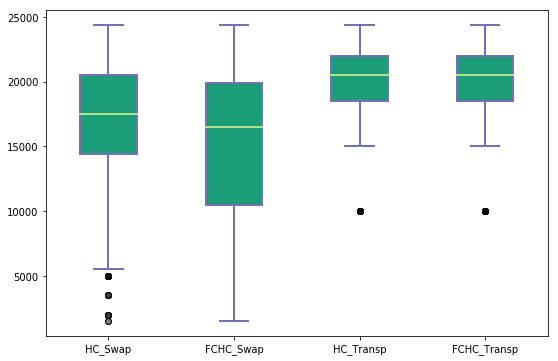

In [39]:

# def setLabelExample():
#     fig = pyplot.figure() 
#     x = [i for i in range(200)]
#     y = [xi**2 for xi in x]

#     ax = fig.add_subplot(1,1,1)
#     ax.plot(x, y) 
#     ax.tick_params(axis='x', labelsize=30)

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)

## add patch_artist=True option to ax.boxplot() 
## to get fill color
bp = ax.boxplot(data_to_plot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    
## Custom x-axis labels
ax.set_xticklabels(['HC_Swap', 'FCHC_Swap', 'HC_Transp', 'FCHC_Transp'])

## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')